<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Take-Home File 2<br>(Week 1 - Day 5)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df=pd.read_csv("/content/diamond_data.csv")
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

#<b> EDA STEPS (OPTIONAL)

In [4]:
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


# <i> LABEL ENCODING ON cut and color


In [9]:
df_filtered=df

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_filtered["cut"] = label_encoder.fit_transform(df_filtered["cut"])
df_filtered["color"] = label_encoder.fit_transform(df_filtered["color"])

In [3]:
df.dtypes

carat    float64
cut       object
color     object
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df["depth"].skew()


# skewness is close to 0, the distribution is approximately symmetric.

0.02456516941239219

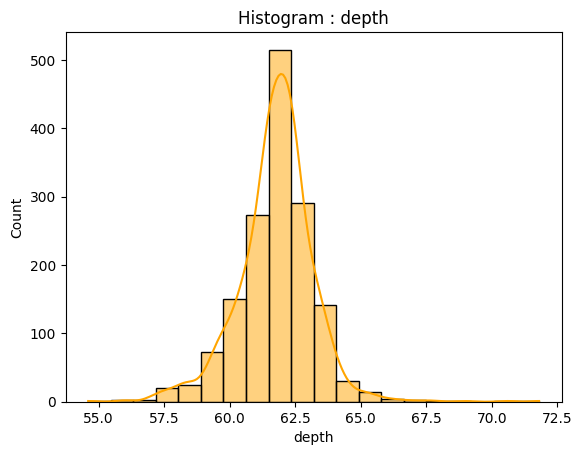

In [8]:
sns.histplot(df["depth"], bins=20, kde=True, color="orange")
plt.title("Histogram : depth")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df_filtered.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,1,2,61.1,61.0,682,4.29,4.32,2.63
1,0.72,2,4,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,3,6,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,3,1,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,2,0,62.7,56.0,1720,5.17,5.14,3.23


In [13]:
x=df_filtered.drop("price",axis=1)
y=df_filtered['price']
x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1482.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:47:50   Log-Likelihood:                -13396.
No. Observations:                1547   AIC:                         2.681e+04
Df Residuals:                    1538   BIC:                         2.686e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2573.5219   8430.984     -0.305      0.7

In [16]:
residuals = ols_model.resid

In [18]:
sm.stats.durbin_watson(residuals)

1.9455603998963338

In [22]:
dw_statistic = sm.stats.durbin_watson(residuals)

print(f"Durbin-Watson Statistic: {dw_statistic}")

if dw_statistic < 2:
    print("Evidence of positive serial correlation.")
elif dw_statistic > 2:
    print("Evidence of negative serial correlation.")
else:
    print("No evidence of serial correlation.")

Durbin-Watson Statistic: 1.9455603998963338
Evidence of positive serial correlation.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<b>FORWARD SELECTION

In [24]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()


In [25]:
df_filtered.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,1,2,61.1,61.0,682,4.29,4.32,2.63
1,0.72,2,4,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,3,6,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,3,1,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,2,0,62.7,56.0,1720,5.17,5.14,3.23


In [26]:
from sklearn.model_selection import train_test_split
y=df_filtered["price"]
x=df_filtered.drop("price",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=100)
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1082, 8)
(465, 8)
(1082,)
(465,)


In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


# Forward
lr = LinearRegression()
lr_sfs =  sfs(estimator=lr, k_features=5, forward=True)

sfs_forward = lr_sfs.fit(x_train,y_train)
forward_features = list(sfs_forward.k_feature_names_)
forward_features

['carat', 'color', 'table', 'x', 'z']

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


# Forward best
lr = LinearRegression()
lr_sfs =  sfs(estimator=lr, k_features="best", forward=True , verbose=2)

sfs_forward = lr_sfs.fit(x_train,y_train)
forward_features = list(sfs_forward.k_feature_names_)
forward_features


[2023-11-26 11:03:48] Features: 1/8 -- score: 0.8561698704501677
[2023-11-26 11:03:48] Features: 2/8 -- score: 0.8630678903358401
[2023-11-26 11:03:48] Features: 3/8 -- score: 0.8702904493544322
[2023-11-26 11:03:48] Features: 4/8 -- score: 0.8725283745573995
[2023-11-26 11:03:49] Features: 5/8 -- score: 0.8734516941185527
[2023-11-26 11:03:49] Features: 6/8 -- score: 0.8733458891655858
[2023-11-26 11:03:49] Features: 7/8 -- score: 0.8730081585136293
[2023-11-26 11:03:49] Features: 8/8 -- score: 0.8721619727473924

['carat', 'color', 'table', 'x', 'z']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(x_train, y_train):
    x_train_k = x_train.iloc[train_index]
    x_test_k  = x_train.iloc[test_index]

    y_train_k = y_train.iloc[train_index]
    y_test_k  = y_train.iloc[test_index]

    lr_k = LinearRegression()
    lr_k.fit(x_train_k, y_train_k)
    y_pred_k = lr_k.predict(x_test_k)
    r2_score_K = r2_score(y_test_k, y_pred_k)
    print('R2 score ', r2_score_K )

R2 score  0.8846931673158901
R2 score  0.8406508104941779
R2 score  0.9032393282923412
R2 score  0.8446745279463613
R2 score  0.8875520296881912


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# HERE I HAVE USED STATS MODEL TO DETERMINE LEAST SIGNIFICANT CCOLUMN

x=df_filtered.drop("price",axis=1)
y=df_filtered['price']
x_c=sm.add_constant(x)
ols_model=sm.OLS(y,x_c).fit()
print(ols_model.summary())



# HERE I GOT cut

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1482.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:11:17   Log-Likelihood:                -13396.
No. Observations:                1547   AIC:                         2.681e+04
Df Residuals:                    1538   BIC:                         2.686e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2573.5219   8430.984     -0.305      0.7

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
ols_model.resid.skew()

1.1204394922403156

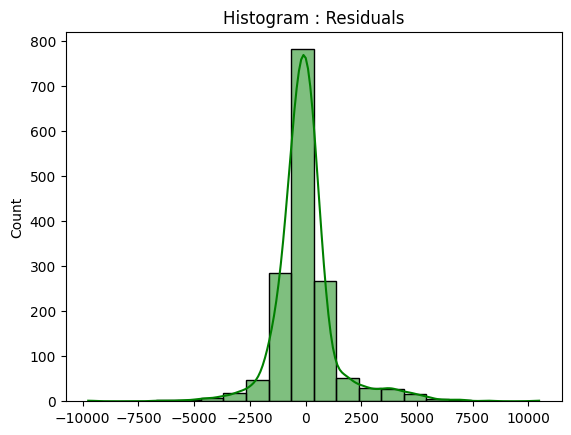

In [39]:
sns.histplot(ols_model.resid, bins=20, kde=True, color="green")
plt.title("Histogram : Residuals")
plt.show()


# skewness is greater than 0, the distribution is skewed to the right little.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
np.log1p(ols_model.resid).skew()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


-0.39937703489867055

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


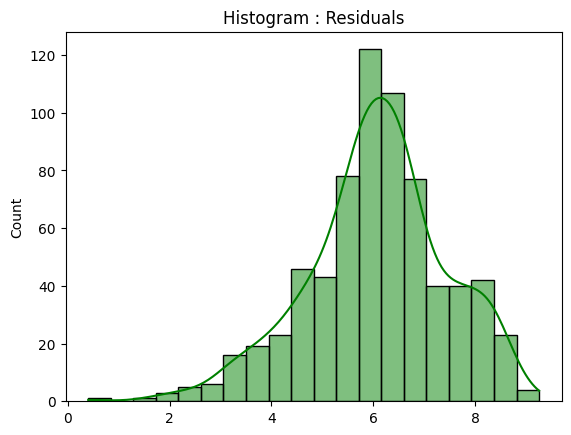

In [40]:
# APPLYING LOG TRANSFORMATION

sns.histplot(np.log1p(ols_model.resid), bins=20, kde=True, color="green")
plt.title("Histogram : Residuals")
plt.show()


# HERE I HAVE CONVERTED IT  CLOSE TO )

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:

# Backward best
lr = LinearRegression()
lr_sfs =  sfs(estimator=lr, k_features="best", forward=False , verbose=2)

sfs_forward = lr_sfs.fit(x_train,y_train)
backward_features = list(sfs_forward.k_feature_names_)
backward_features


[2023-11-26 11:20:16] Features: 7/1 -- score: 0.8730081585136293
[2023-11-26 11:20:16] Features: 6/1 -- score: 0.8733458891655858
[2023-11-26 11:20:16] Features: 5/1 -- score: 0.8735531369348287
[2023-11-26 11:20:16] Features: 4/1 -- score: 0.8736765155557127
[2023-11-26 11:20:16] Features: 3/1 -- score: 0.8696301540134129
[2023-11-26 11:20:16] Features: 2/1 -- score: 0.8630678903358401
[2023-11-26 11:20:16] Features: 1/1 -- score: 0.8561698704501677

['carat', 'color', 'table', 'z']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
X = df_filtered['color']
y = df_filtered['price']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


# p-value close to zero indicates that the color is highly statistically significant in predicting the price.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     32.19
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.67e-08
Time:                        11:23:28   Log-Likelihood:                -15054.
No. Observations:                1547   AIC:                         3.011e+04
Df Residuals:                    1545   BIC:                         3.012e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3057.0962    186.772     16.368      0.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# Backward five
lr = LinearRegression()
lr_sfs =  sfs(estimator=lr, k_features=5, forward=False , verbose=2)

sfs_forward = lr_sfs.fit(x_train,y_train)
backward_features = list(sfs_forward.k_feature_names_)
backward_features


[2023-11-26 11:21:26] Features: 7/5 -- score: 0.8730081585136293
[2023-11-26 11:21:26] Features: 6/5 -- score: 0.8733458891655858
[2023-11-26 11:21:26] Features: 5/5 -- score: 0.8735531369348287

['carat', 'cut', 'color', 'table', 'z']